In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#csr_matrix and NearestNeighbors algorithm:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [3]:
movies_csv = pd.read_csv('movies.csv')


In [4]:

ratings_csv = pd.read_csv('ratings.csv')

In [5]:
# Shapes of two ds:
movies_csv.shape, ratings_csv.shape

((10329, 3), (105339, 4))

In [6]:
# Displaying first 5 records of movies dataset:
movies_csv.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
# Displaying first 5 records of ratings dataset:
ratings_csv.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [8]:
ratings_csv.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [9]:
movies_csv.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [10]:
movies_csv.duplicated().sum()

0

In [11]:
ratings_csv.duplicated().sum()

0

Hence we can conclude that null and duplictaed values are not present in the datasets .

In [12]:
movies_csv.count()

movieId    10329
title      10329
genres     10329
dtype: int64

In [13]:
movies_csv['movieId'].nunique()

10329

In [14]:
movies_csv['genres'].nunique()

938

In [15]:
movies_csv['title'].nunique()

10327

From the 10329 movies, 938 are of unique genre (separate and mixed genres) while 10011 are unique movies (titles).

Distribution of ratings value:

In [16]:
ratings_csv['rating'].value_counts()

4.0    28880
3.0    21729
5.0    14856
3.5    12237
4.5     8187
2.0     7943
2.5     5484
1.0     3258
1.5     1567
0.5     1198
Name: rating, dtype: int64

By this we can determine that the average rating is 3.5 given to a movie by no.of users

Also, there are max 149532 movies rated by 668 users

In [17]:
ratings_csv.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [20]:

# Removing movie year information for example :converting 'Batman (1989)' to "Batman":
movies_csv_clone = movies_csv[:] #keeping a clone of the original dataset
movies_csv['title'] = movies_csv['title'].str.replace(r'\s*\(\d+\)', '')
movies_csv['title'].head(10)

0                      Toy Story
1                        Jumanji
2               Grumpier Old Men
3              Waiting to Exhale
4    Father of the Bride Part II
5                           Heat
6                        Sabrina
7                   Tom and Huck
8                   Sudden Death
9                      GoldenEye
Name: title, dtype: object

In [22]:
combined_df = movies_csv.merge(ratings_csv, on='movieId')
combined_df.head(10)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286
5,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,17,5.0,1350206819
6,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,28,3.0,884098350
7,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,29,4.0,846942580
8,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,30,4.5,1292690069
9,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,31,4.0,832397496


In [23]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105339 entries, 0 to 105338
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    105339 non-null  int64  
 1   title      105339 non-null  object 
 2   genres     105339 non-null  object 
 3   userId     105339 non-null  int64  
 4   rating     105339 non-null  float64
 5   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.6+ MB


Creating film matrix:

In [25]:
film_mat = combined_df.pivot_table(index='userId', columns='title', values='rating')
film_mat.head(5)

title,Days of Summer,'71,'Hellboy': The Seeds of Creation,'Round Midnight,'Til There Was You,"'burbs, The",'night Mother,*batteries not included,...And Justice for All,10,...,[REC],[REC]²,[REC]³ 3 Génesis,a/k/a Tommy Chong,eXistenZ,loudQUIETloud: A Film About the Pixies,xXx,xXx: State of the Union,¡Three Amigos!,À nous la liberté (Freedom for Us)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
film_mat.tail()

title,Days of Summer,'71,'Hellboy': The Seeds of Creation,'Round Midnight,'Til There Was You,"'burbs, The",'night Mother,*batteries not included,...And Justice for All,10,...,[REC],[REC]²,[REC]³ 3 Génesis,a/k/a Tommy Chong,eXistenZ,loudQUIETloud: A Film About the Pixies,xXx,xXx: State of the Union,¡Three Amigos!,À nous la liberté (Freedom for Us)
userId,,,,,,,,,,,,,,,,,,,,,
664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,2.0,NaN,NaN,2.5,NaN,NaN,NaN,NaN,3.0,2.5,...,NaN,1.5,0.5,NaN,2.0,NaN,3.5,NaN,2.0,3.0


CONTENT BASED COLLABORATIVE RECOMMENDATION SYSTEM:

### Displaying movies in genre "Action|Comedy|Sci-Fi" :


In [27]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

In [28]:
# Creating input widgets for movie name and number of recommendations
movie_title_widget = widgets.Text(value='', placeholder='Enter your interested movie name', description='Movie Name:',
  disabled=False)

num_recomms_widget = widgets.IntText(value=5,description='Num Recommends:',disabled=False)

output = widgets.Output()

In [29]:
# Define a function to generate recommendations
def generate_recommendations(movie_title, num_recomms):
    Filtered_dataset = film_mat[movie_title] #selection of movie
    similar_to_movie_title = film_mat.corrwith(Filtered_dataset) #applying Pearson Correlation
    Corr_movie_title = pd.DataFrame(similar_to_movie_title, columns=['Correlation']) #correlation df
    Corr_movie_title.dropna(inplace=True) #dropping null values
    Corr_movie_title = Corr_movie_title.sort_values('Correlation', ascending=False) #sorting according to correlation

    movie_title_ratings = pd.DataFrame(merged_df.groupby('title')['rating'].mean()) #ratings mean df
    movie_title_ratings['No_of_ratings'] = pd.DataFrame(merged_df.groupby('title')['rating'].count()) #count df
    movie_title_ratings.drop('rating', axis=1, inplace=True) #dropping null values again
    Corr_movie_title = Corr_movie_title.join(movie_title_ratings['No_of_ratings']) #joining No. of ratings cols
    
    #Threshold of 100 ratings for a selected movie
    Recommendations = Corr_movie_title[Corr_movie_title['No_of_ratings'] > 100].sort_values('Correlation', ascending=False)
    return Recommendations.head(num_recomms) #requested number of recommendations

# Create a button widget to trigger recommendations
generate_button = widgets.Button(
    description='Generate Recommendations',
    disabled=False,
    button_style='success',  # 'success', 'info', 'warning', 'danger' or ''
)

# Define a function to handle button click event
def generate_button_click(b):
    output.clear_output()
    movie_name = movie_title_widget.value
    num_recommendations = num_recomms_widget.value
    with output:
        recommendations = generate_recommendations(movie_name, num_recommendations)
        display(recommendations)

generate_button.on_click(generate_button_click)


In [30]:
# Display the widgets
display(movie_title_widget)
display(num_recomms_widget)
display(generate_button)
print("Next Movie Recommendations ======>")
display(output)

Text(value='', description='Movie Name:', placeholder='Enter your interested movie name')

IntText(value=5, description='Num Recommends:')

Button(button_style='success', description='Generate Recommendations', style=ButtonStyle())

Next Movie Recommendations ======>


Output()

POPULARITY BASED COLLABORATIVE RECOMMENDATION SYSTEM


In [32]:
# Viewing different genres present in the dataset:
genres = list(movies_csv['genres'].unique())
print(genres[:30])

['Adventure|Animation|Children|Comedy|Fantasy', 'Adventure|Children|Fantasy', 'Comedy|Romance', 'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller', 'Adventure|Children', 'Action', 'Action|Adventure|Thriller', 'Comedy|Horror', 'Adventure|Animation|Children', 'Drama', 'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance', 'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller', 'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi', 'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi', 'Mystery|Sci-Fi|Thriller', 'Adventure|Romance|IMAX', 'Drama|War', 'Action|Crime|Drama', 'Action|Adventure|Fantasy', 'Comedy|Drama|Thriller', 'Mystery|Thriller', 'Animation|Children|Drama|Musical|Romance', 'Crime|Mystery|Thriller']


In [34]:
movies_csv.nunique()

movieId    10329
title      10011
genres       938
dtype: int64

Merging two dfs using left join method:

In [36]:
merged_df1 = pd.merge(ratings_csv, movies_csv, on='movieId', how='left')
merged_df1.head(2)

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino,Crime|Drama
1,1,24,1.5,1217895807,Powder,Drama|Sci-Fi


In [37]:
merged_df1.shape

(105339, 6)

In [38]:
merged_df1_copy = merged_df1[:]
merged_df1 = merged_df1[['title', 'genres','rating']] #taking only requied columns
merged_df1.head(2)

,title,genres,rating
0,Casino,Crime|Drama,4.0
1,Powder,Drama|Sci-Fi,1.5


In [39]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Creating input widgets for genre, minimum reviews, and number of recommendations
genre_widget = widgets.Text(
    value='',
    placeholder='Enter your favorite genre',
    description='Genre:',
    disabled=False
)

mini_thresh_widget = widgets.IntText(
    value=100,
    description='Min Reviews:',
    disabled=False
)

num_recommends_widget = widgets.IntText(
    value=5,
    description='Num of Recommends:',
    disabled=False
)


In [40]:
def generate_genre_recommendations(genre, mini_thresh, num_recommends): #keeping genres column to make out all movies present in
    moviedf = merged_df1.groupby(['title', 'genres']).agg({'rating': ['mean', 'count']}) #selected genre
    moviedf.columns = ['Avg Rating', 'Num Reviews'] #renaming column names
    moviedf = moviedf.reset_index() #reseting index to again create columns from indexes
    moviedf = moviedf.sort_values('Num Reviews', ascending=False) #sorting according to Num Reviews
    
    selection_genre = moviedf[moviedf['genres'].str.contains(genre)] #validation to contain the genre type
    minimum_ratings = selection_genre[selection_genre['Num Reviews'] > mini_thresh] #filtering according to minimum threshold
    return minimum_ratings.head(num_recommends) #displaying according to requested number of recommendations

# Creating a button widget to trigger recommendations
generate_button = widgets.Button(
    description='Generate Recommendations',
    disabled=False,
    button_style='success'  # 'success', 'info', 'warning', 'danger' or ''
)

output = widgets.Output() #to return output


In [41]:
# Defining a function to handle button click event
def generate_button_click(b):
    output.clear_output() #clearing output
    genre = genre_widget.value.strip() #strip to remove leading and trailing spaces
    mini_thresh = mini_thresh_widget.value
    num_recommends = num_recommends_widget.value
    with output:
        recommendations = generate_genre_recommendations(genre, mini_thresh, num_recommends) #1st function calling
        display(recommendations)

generate_button.on_click(generate_button_click) #2nd function calling

# Display the widgets
display(genre_widget)
display(mini_thresh_widget)
display(num_recommends_widget)
display(generate_button)
print("Your watch list for the selected genre ======>")
display(output)

Text(value='', description='Genre:', placeholder='Enter your favorite genre')

IntText(value=100, description='Min Reviews:')

IntText(value=5, description='Num of Recommends:')

Button(button_style='success', description='Generate Recommendations', style=ButtonStyle())

Your watch list for the selected genre ======>


Output()

USER BASED COLLABORATIVE RECOMMENDATION SYSTEM USING KNN ALGORITHM:

In [43]:
combined_df.head(2)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039


In [45]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105339 entries, 0 to 105338
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    105339 non-null  int64  
 1   title      105339 non-null  object 
 2   genres     105339 non-null  object 
 3   userId     105339 non-null  int64  
 4   rating     105339 non-null  float64
 5   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.6+ MB


In [48]:
# Creating movie matrix for colloborative filtering recommendation system:
movies_matrics = combined_df.pivot_table(index='movieId', columns='userId', values='rating')
movies_matrics.fillna(0, inplace=True)
movies_matrics.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,5.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,4.0,5.0,3.0,0.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5


In [49]:
#userId = 1 ratings distribution:
movies_matrics[1].value_counts()

0.0    10212
4.0       26
4.5       25
3.5       21
3.0       12
5.0       12
1.5        6
0.5        6
2.5        4
2.0        1
Name: 1, dtype: int64

In [50]:
movies_matrics.shape

(10325, 668)

1. To qualify a movie, a minimum of 10 users should have voted a movie.
2. To qualify a user, a minimum of 50 movies should have voted by the user.

In [53]:
no_user_voted = ratings_csv.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings_csv.groupby('userId')['rating'].agg('count')

In [54]:
no_user_voted.shape, no_movies_voted.shape

((10325,), (668,))

Visualization of constraints decided:

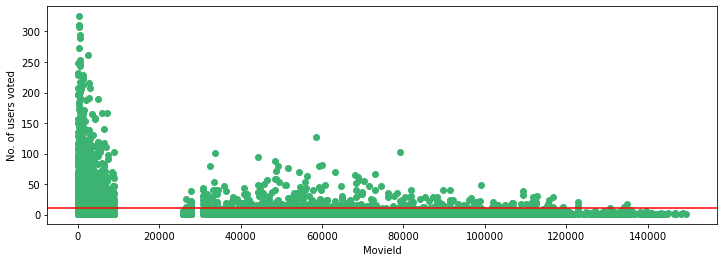

In [55]:
f,ax = plt.subplots(1,1,figsize=(12,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=10,color='r') #threshold of 10 users ratings
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [56]:
final_dataset = movies_matrics.loc[no_user_voted[no_user_voted > 10].index,:] #selecting only those movies which are voted by more than 10 users
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,5.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,4.0,5.0,3.0,0.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5


In [57]:
final_dataset.shape
#movies count reduced to 2160 because of the 1st constraint applied

(2160, 668)

Visualizing the number of votes by each user with the threshold value of 50.

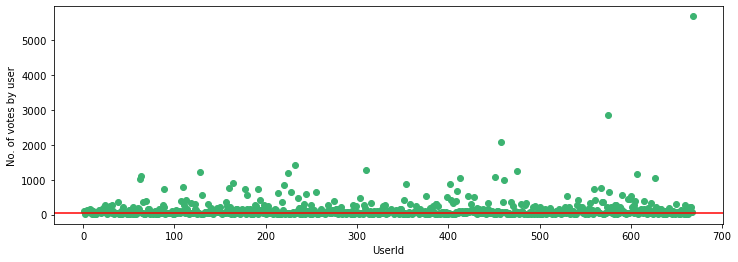

In [58]:
f,ax = plt.subplots(1,1,figsize=(12,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r') #threshold of votes by each user in terms of all movies available
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()


Now, applying the second constraint, the columns size will also get reduced:


In [59]:
final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted > 50].index] #selecting only those users who had voted more than 50 movies
final_dataset.head()

userId,1,3,4,5,6,7,8,9,11,15,...,656,657,659,661,662,664,665,666,667,668
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,4.0,0.0,...,0.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,3.0
3,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.5


In [60]:
final_dataset.shape
#Columns reduced to 420 from 668

(2160, 420)

In [61]:
# For using csr_matrix and NearestNeighbors algorithm:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [62]:
# Applying csr_matrix function to remove sparsity from the dataset:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [63]:
final_dataset.shape

(2160, 421)


Here, we are going to use cosine distance metric to get similarity between different data points(users):

In [64]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1) #intializing the model
knn.fit(csr_data) #fitting the csr_data with the model

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [65]:
import ipywidgets as widgets
from IPython.display import display

# Create an input widget for movie name
movie_name_widget = widgets.Text(
    value='',
    placeholder='Enter a movie name',
    description='Movie Name:',
    disabled=False
)

output = widgets.Output()


In [66]:
# Define a function to get movie recommendations
def get_movie_recommendation(movie_name):
    n_movies_to_recommend = 10
    movie_list = merged_df[merged_df['title'].str.contains(movie_name)]
    
    if len(movie_list) > 0:
        movie_idx = movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        
        distances, indices = knn.kneighbors(csr_data[movie_idx], n_neighbors=n_movies_to_recommend + 1)
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())),
                                    key=lambda x: x[1])[:0:-1]
        
        recommend_frame = []
        
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = merged_df[merged_df['movieId'] == movie_idx].index
            recommend_frame.append({'Title': merged_df.iloc[idx]['title'].values[0], 'Distance': val[1]})
        
        df = pd.DataFrame(recommend_frame, index=range(1, n_movies_to_recommend + 1))
        return df
    else:
        return "No movies found. Please check your input"

In [67]:
# Define a function to handle button click event
def get_recommendations_button_click(b):
    output.clear_output()
    movie_name = movie_name_widget.value
    with output:
        recommendations = get_movie_recommendation(movie_name)
        display(recommendations)

# Create a button widget to trigger recommendations
get_recommendations_button = widgets.Button(
    description='Get Recommendations',
    disabled=False,
    button_style='success'  # 'success', 'info', 'warning', 'danger' or ''
)

# Set the button's click event handler
get_recommendations_button.on_click(get_recommendations_button_click)

# Display the widgets
display(movie_name_widget)
display(get_recommendations_button)
print("Top 10 Movies related to this movie ===>")
display(output)

Text(value='', description='Movie Name:', placeholder='Enter a movie name')

Button(button_style='success', description='Get Recommendations', style=ButtonStyle())

Top 10 Movies related to this movie ===>


Output()